# **Final Report**
**Add name:  Mongolia Lee, Jubal Whitlatch,**

#1. Executive Summary

In our rigorous analysis, we explored the relationship between race/ethnicity, parent's education, lunch program participation, test prep, and students' exam scores in math, reading, and writing. By conducting multiple linear regression analyses and hypothesis testing, we aimed to determine the impact of these factors on academic performance. Surprisingly, our findings revealed that there was limited correlation between these external factors and students' exam scores. Our results suggest that individual student performance may be influenced more by intrinsic abilities rather than external variables. Further research is needed to delve deeper into the complex interplay between these factors and academic achievement.

# 2. Introduction

Data Analysis Question: How do factors such as race/ethnicity, parent's education, participation in lunch programs, and test prep impact a student's exam score in math, reading, and writing?

In [ ]:
import pandas as pd

#data dictionary created to help give information regarding data being analyzed
dataDictionary=pd.read_csv('dataDictionaryGroup7.csv')

dataDictionary

,Name,Modeling data type,Description,Unit,Input/Target
0,gender,Categorical,Gender of the student,male/female,Input
1,race_eth,Categorical,Ethnicity or race of the student,Group A/B/C/D/E,Input
2,parent edu,Categorical,Education level of the student's parent or gua...,"some college/high school, associate's/bachelor...",Input
3,lunch program,Categorical,Whether the student is enrolled in the free/re...,free/reduced or standard,Input
4,test prep,Categorical,Whether the student completed a test preparati...,none/completed,Input
5,math score,Continuous,Score achieved by the student in math,Points (out of 100),Target
6,reading score,Continuous,Score achieved by the student in reading,Points (out of 100),Target
7,writing score,Continuous,Score achieved by the student in writing,Points (out of 100),Target


#3. Data Exploration and Visualization

In [ ]:
import pandas as pd

#read original file for student exam performance
df = pd.read_csv('StudentsPerformance.csv')

#displays the first 5 rows of the dataframe
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#renaming columns for clarity and quicker coding

df.rename({'parental level of education' : 'parent edu'}, axis=1, inplace=True)
df.rename({'test preparation course' : 'test prep'}, axis=1, inplace=True)
df.rename({'lunch' : 'lunch program'}, axis=1, inplace=True)
df.rename({'race/ethnicity' : 'race_eth'}, axis=1, inplace=True)

In [ ]:
#checking datatypes
df.dtypes

gender           object
race_eth         object
parent edu       object
lunch program    object
test prep        object
math score        int64
reading score     int64
writing score     int64
dtype: object

In [ ]:
#fixing datatypes to better fit the study
df["math score"] = df["math score"].astype('int8')
df["reading score"] = df["reading score"].astype('int8')
df["writing score"] = df["writing score"].astype('int8')

Attributes of each column:

Gender = qualitative - dichotomous - Male or Female

Race/Ethnicity = qualitative - nominal

Parental Level of Education = qualitative - ordinal

Lunch = qualitative - dichotomous - Standard or Free/Reduced

Test Preparation Course = qualitative - dichotomous - None or Completed

Math Score = quantitative - discrete

Reading Score = quantitative - discrete

Writing Score = quantitative - discrete

In [ ]:
#displays the min, max, mean, median (50%), and std for all
#quantitative attributes (columns) and indication of any missing values.

df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The results of almost all the mean, std, min, etc. are similar, falling within a couple numbers of each other. Only 2 of the results in this code have a decimal point--the mean and std, which involve division. This makes sense as all testing values are whole numbers (hence why the types are not float[#], but int[#]).

Check Data Values

In [ ]:
for column in df:
  value = df[column].dtype
  if (value == 'object'):
    print(df.value_counts(column))
    print()

gender
female    518
male      482
Name: count, dtype: int64

race_eth
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parent edu
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch program
standard        645
free/reduced    355
Name: count, dtype: int64

test prep
none         642
completed    358
Name: count, dtype: int64



In [ ]:
#checking for missing values
df.isnull().any()

gender           False
race_eth         False
parent edu       False
lunch program    False
test prep        False
math score       False
reading score    False
writing score    False
dtype: bool

Boxplot, Check for Outliers

<Axes: >

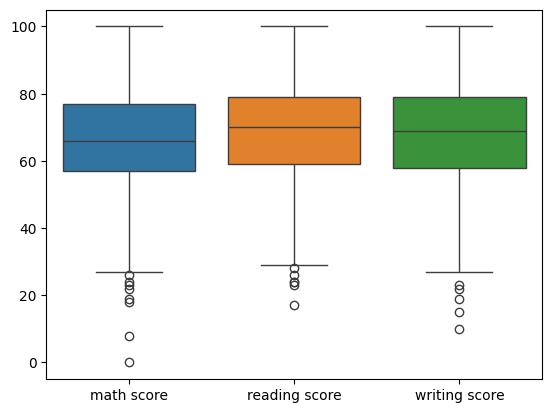

In [ ]:
import seaborn as sns

#create a boxplot for the columns 'reading_score', 'writing_score', and 'math_score'
sns.boxplot(data=df[['math score','reading score','writing score']])

There are a few outliers below roughly the 25 mark. This makes sense since the majority of students scored between ~55 and ~75, meaning anything below 30 would be significantly lower than the other students. However, some students performing poorly on a test is always expected, so these outliers make total sense to be here. There are a few dots all the way at 0, and these probably indicate the student not showing up or just not participating, as the chances of a student getting absolutely nothing correct are incredibly low.

Additional Visuals

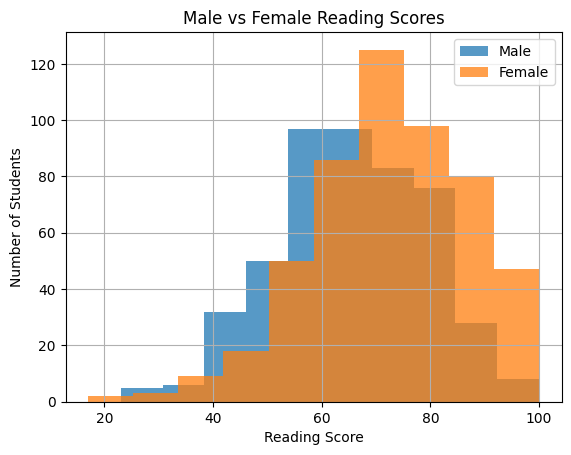

In [ ]:
import matplotlib.pyplot as plt

#filter the dataframe to separate male and female students
male = df.query('gender=="male"')
female = df.query('gender=="female"')

#create a histogram to compare reading scores of male and female students
plt.title('Male vs Female Reading Scores')
male['reading score'].hist(label='Male', alpha=0.75)
female['reading score'].hist(label='Female', alpha=0.75)
plt.xlabel('Reading Score')
plt.ylabel('Number of Students')
plt.legend()

plt.show()

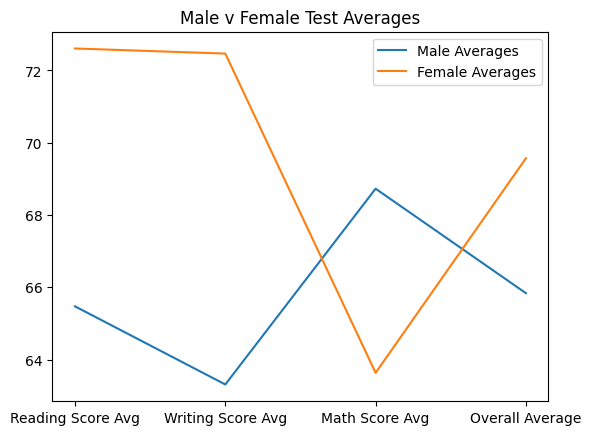

In [ ]:
tests = ['Reading Score Avg', 'Writing Score Avg', 'Math Score Avg', 'Overall Average']

#finding mean of male student in each exam
m_read = male['reading score'].mean()
m_write = male['writing score'].mean()
m_math = male['math score'].mean()
m_overall = (m_read + m_write + m_math)/3

male_values = [m_read, m_write, m_math, m_overall]

#finding mean of female student in each exam
f_read = female['reading score'].mean()
f_write = female['writing score'].mean()
f_math = female['math score'].mean()
f_overall = (f_read + f_write + f_math)/3

female_values = [f_read, f_write, f_math, f_overall]

# creates a line graph showing the average test scores for reading, writing,
# math, and overall averages for male and female students, allowing for a visual
# comparison of the two groups.
plt.plot(tests, male_values, label='Male Averages')
plt.plot(tests, female_values, label='Female Averages')
plt.title('Male v Female Test Averages')
plt.legend()

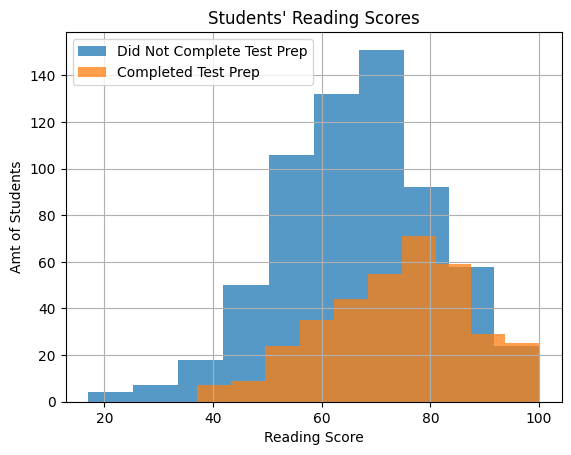

In [ ]:
prepped = df.query('`test prep`=="completed"')
noprep = df.query('`test prep`=="none"')

# plots the histogram to compare reading scores of students who completed and
# did not complete test prep
plt.title(f'Students\' Reading Scores')
noprep['reading score'].hist(label='Did Not Complete Test Prep', alpha=0.75)
prepped['reading score'].hist(label='Completed Test Prep', alpha=0.75)
plt.xlabel('Reading Score')
plt.ylabel('Amt of Students')
plt.legend()

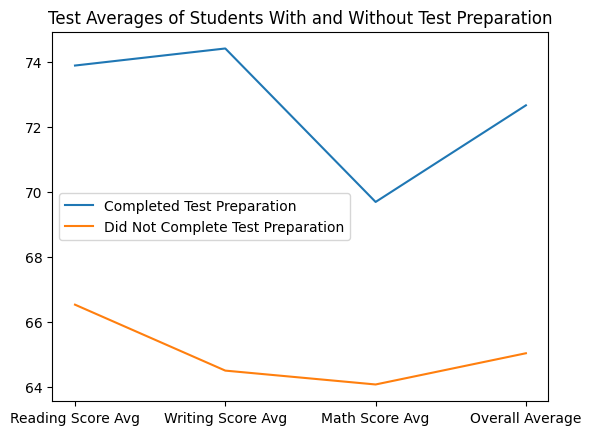

In [ ]:
prepped = df.query('`test prep`=="completed"')
noprep = df.query('`test prep`=="none"')
tests = ['Reading Score Avg', 'Writing Score Avg', 'Math Score Avg', 'Overall Average']

#finding mean of student who did take test prep
prep_read = prepped['reading score'].mean()
prep_write = prepped['writing score'].mean()
prep_math = prepped['math score'].mean()
prep_overall = (prep_read + prep_write + prep_math)/3

prep_values = [prep_read, prep_write, prep_math, prep_overall]

#finding mean of student who did not take test prep
no_read = noprep['reading score'].mean()
no_write = noprep['writing score'].mean()
no_math = noprep['math score'].mean()
no_overall = (no_read + no_write + no_math)/3

noprep_values = [no_read, no_write, no_math, no_overall]

# create a line graph showing the average test scores for students who completed
# the test preparation and for students who did not complete the test preparation
plt.plot(tests, prep_values, label='Completed Test Preparation')
plt.plot(tests, noprep_values, label='Did Not Complete Test Preparation')
plt.title('Test Averages of Students With and Without Test Preparation')
plt.legend()

Do you guys think we need to save the files in between too? or nah? since it is technically just one notebook we are working in- ML

I don't think we need to, but it never hurts. -JW

In [ ]:
#saving into new file to not lose original
#updated file
df.to_csv("StudentExams.csv", index = False)

#4. Data Preparation

In [ ]:
import pandas as pd

#new file to not mess with original file
df = pd.read_csv('StudentExams.csv')

df.head()

,gender,race_eth,parent edu,lunch program,test prep,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Multicollinearity

<Axes: >

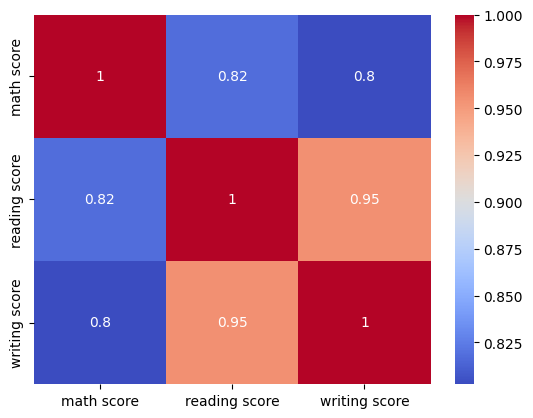

In [ ]:
import seaborn as sns

#select only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['float64', 'int64'])

#creates the correlation matrix
corr = numerical_df.corr()

#plots the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

There appears to be a high risk of multicollinearity with this dataset. The reading and writing scores seem to be highly correlated with the math scores. Additionally, there is a potential overlap in content and skills between reading and writing, so it may be more relevant to just focus on the math scores as the primary predictor in this analysis. However, I believe that by just omitting the reading scores, the dataset will be all right. Math and writing have the least correlation to one another and writing has elements of reading.

#5. Data Modeling

We chose linear regression as our model. This is because logistic regression is primarily used to determine binary outcomes, and ours (a grade ranging from 0-100) is definitely not binary. Wanting to generate continuous outcomes, we ended up landing on linear regression.

Score by Race/Ethnicity

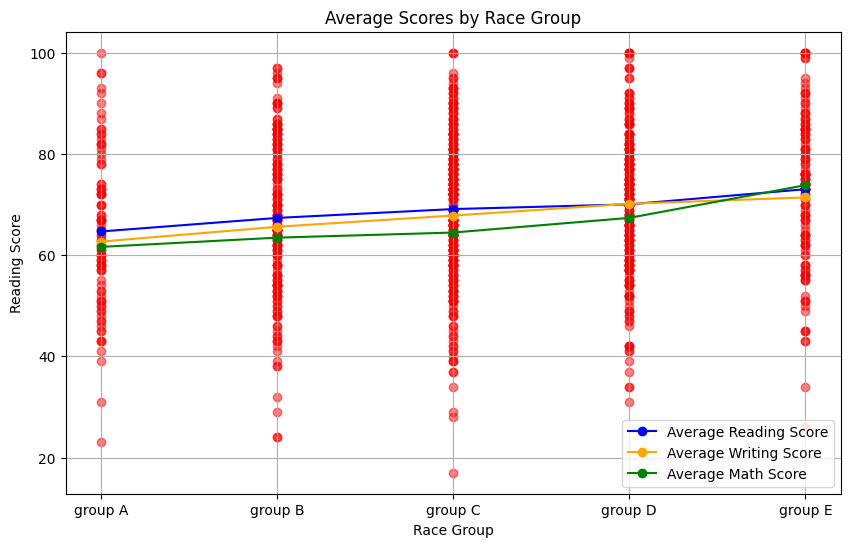

In [ ]:
avg_reading_score = df.groupby('race_eth')['reading score'].mean().reset_index()
avg_writing_score = df.groupby('race_eth')['writing score'].mean().reset_index()
avg_math_score = df.groupby('race_eth')['math score'].mean().reset_index()
avg_reading_score = avg_reading_score.sort_values(by='race_eth')
avg_writing_score = avg_writing_score.sort_values(by='race_eth')
avg_math_score = avg_math_score.sort_values(by='race_eth')

X = avg_reading_score['race_eth']
y_avg = avg_reading_score['reading score']
y_avg2 = avg_writing_score['writing score']
y_avg3 = avg_math_score['math score']

plt.figure(figsize=(10, 6))
plt.plot(X, y_avg, marker='o', color='blue', linestyle='-', label='Average Reading Score')

plt.plot(X, y_avg2, marker='o', color='orange', linestyle='-', label='Average Writing Score')

plt.plot(X, y_avg3, marker='o', color='green', linestyle='-', label='Average Math Score')


actual_scores = df.groupby('race_eth')['reading score'].apply(list).reset_index()
for i, row in actual_scores.iterrows():
    race_group = row['race_eth']
    scores = row['reading score']
    plt.scatter([race_group] * len(scores), scores, color='red', alpha=0.5)

plt.title('Average Scores by Race Group')
plt.xlabel('Race Group')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.show()

#6. Modeling Assumptions Satisfied

I can't figure out the code for some reason, I'm stumped. -JW

^ You ARE NOT ALONE. It's TOO hard code man. Check the file I emailed yall and hopefully it can help you out some 🙏 - OE

Linearity:

Homoscedasticity:

Independence:

Normality:

Independance:

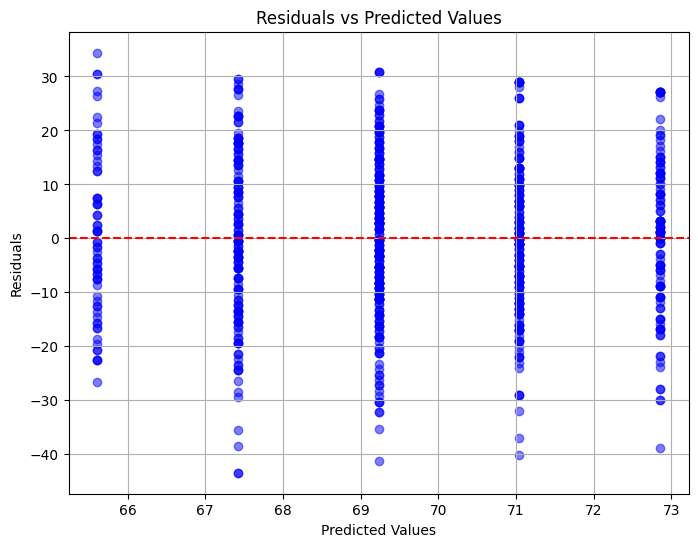

Mean Squared Error (MSE): 204.47709374134328


In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
X_encoded = encoder.fit_transform(df['race_eth'])

X_train, X_test, y_train, y_test = train_test_split(X_encoded, df['reading score'], test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

residuals = y_train - y_train_pred

plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, residuals, c='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

mse = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error (MSE):", mse)


#7. Visualization and Interpretation of the Model

In our project we found that there was really not much correlation between any of the categories (other than between the scores themselves) except for the race groups.

Score by Race/Ethnicity #1

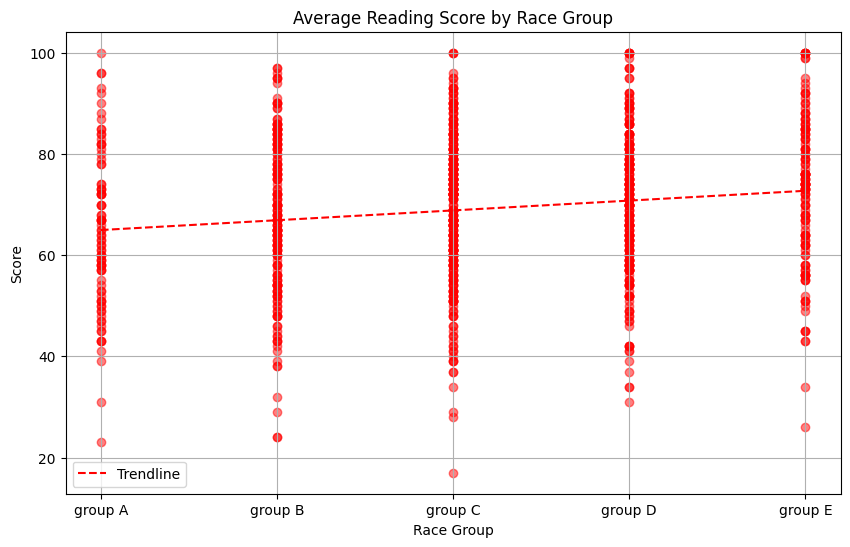

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

avg_reading_score = df.groupby('race_eth')['reading score'].mean().reset_index()
avg_reading_score = avg_reading_score.sort_values(by='race_eth')

encoder = LabelEncoder()
avg_reading_score['race_eth_encoded'] = encoder.fit_transform(avg_reading_score['race_eth'])

X = avg_reading_score['race_eth_encoded'].values.reshape(-1, 1)
y_avg = avg_reading_score['reading score']

model = LinearRegression()
model.fit(X, y_avg.values.reshape(-1, 1))
x_pred = np.array([X.min(), X.max()]).reshape(-1, 1)
y_pred = model.predict(x_pred)

plt.figure(figsize=(10, 6))

plt.plot(x_pred, y_pred, color='red', linestyle='--', label='Trendline')

plt.xticks(range(len(avg_reading_score['race_eth'])), avg_reading_score['race_eth'])

actual_scores = df.groupby('race_eth')['reading score'].apply(list).reset_index()
for i, row in actual_scores.iterrows():
    race_group = row['race_eth']
    scores = row['reading score']
    plt.scatter([encoder.transform([race_group])] * len(scores), scores, color='red', alpha=0.5)

plt.title('Average Reading Score by Race Group')
plt.xlabel('Race Group')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Score by Race/Ethnicity #2

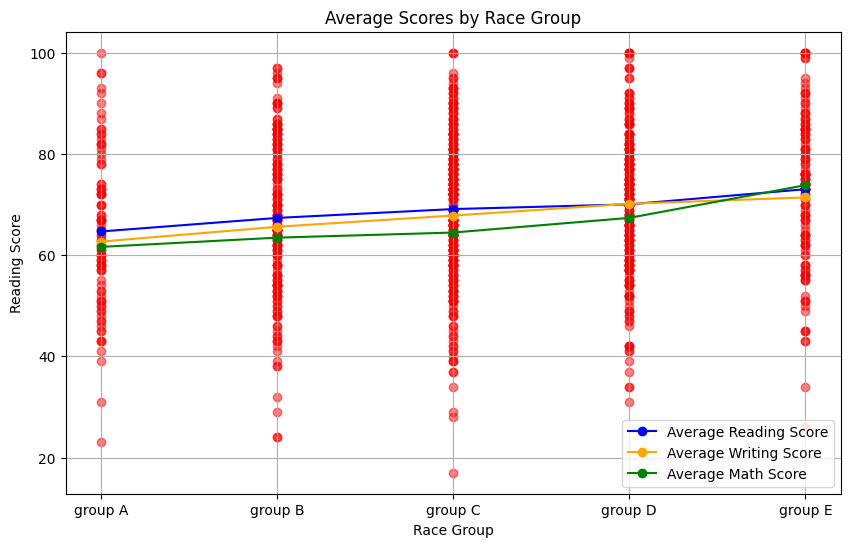

In [ ]:
avg_reading_score = df.groupby('race_eth')['reading score'].mean().reset_index()
avg_writing_score = df.groupby('race_eth')['writing score'].mean().reset_index()
avg_math_score = df.groupby('race_eth')['math score'].mean().reset_index()
avg_reading_score = avg_reading_score.sort_values(by='race_eth')
avg_writing_score = avg_writing_score.sort_values(by='race_eth')
avg_math_score = avg_math_score.sort_values(by='race_eth')

X = avg_reading_score['race_eth']
y_avg = avg_reading_score['reading score']
y_avg2 = avg_writing_score['writing score']
y_avg3 = avg_math_score['math score']

plt.figure(figsize=(10, 6))
plt.plot(X, y_avg, marker='o', color='blue', linestyle='-', label='Average Reading Score')

plt.plot(X, y_avg2, marker='o', color='orange', linestyle='-', label='Average Writing Score')

plt.plot(X, y_avg3, marker='o', color='green', linestyle='-', label='Average Math Score')


actual_scores = df.groupby('race_eth')['reading score'].apply(list).reset_index()
for i, row in actual_scores.iterrows():
    race_group = row['race_eth']
    scores = row['reading score']
    plt.scatter([race_group] * len(scores), scores, color='red', alpha=0.5)

plt.title('Average Scores by Race Group')
plt.xlabel('Race Group')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.show()

Scores by Race/Ethnicity (close-up)

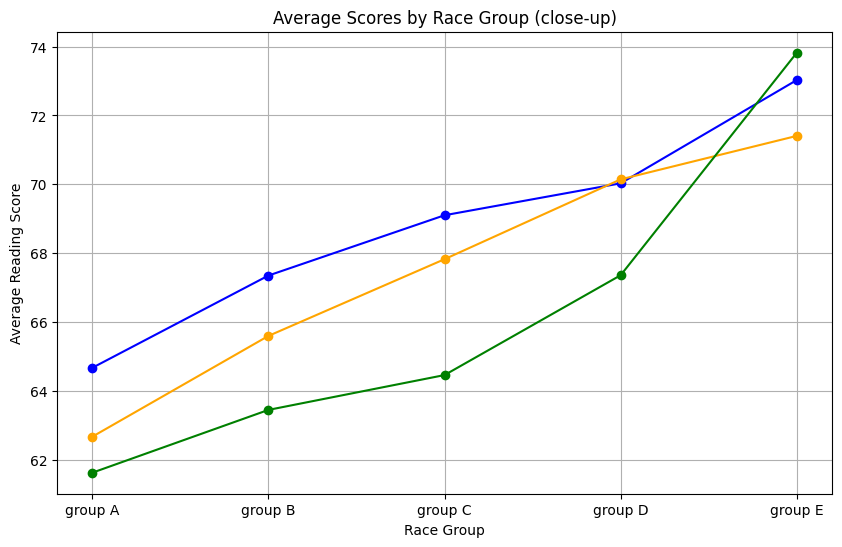

In [ ]:
file_path = 'StudentsPerformance.csv'
data = pd.read_csv(file_path)


avg_reading_score = df.groupby('race_eth')['reading score'].mean().reset_index()
avg_writing_score = df.groupby('race_eth')['writing score'].mean().reset_index()
avg_math_score = df.groupby('race_eth')['math score'].mean().reset_index()
avg_reading_score = avg_reading_score.sort_values(by='race_eth')
avg_writing_score = avg_writing_score.sort_values(by='race_eth')
avg_math_score = avg_math_score.sort_values(by='race_eth')

X = avg_reading_score['race_eth']
y = avg_reading_score['reading score']
y2 = avg_writing_score['writing score']
y3 = avg_math_score['math score']
plt.figure(figsize=(10, 6))
plt.plot(X, y, marker='o', color='blue', linestyle='-', label='Average Reading Score')
plt.plot(X, y2, marker='o', color='orange', linestyle='-', label='Average Writing Score')
plt.plot(X, y3, marker='o', color='green', linestyle='-', label='Average Math Score')
plt.title('Average Scores by Race Group (close-up)')
plt.xlabel('Race Group')
plt.ylabel('Average Reading Score')
plt.grid(True)
plt.show()

TEST

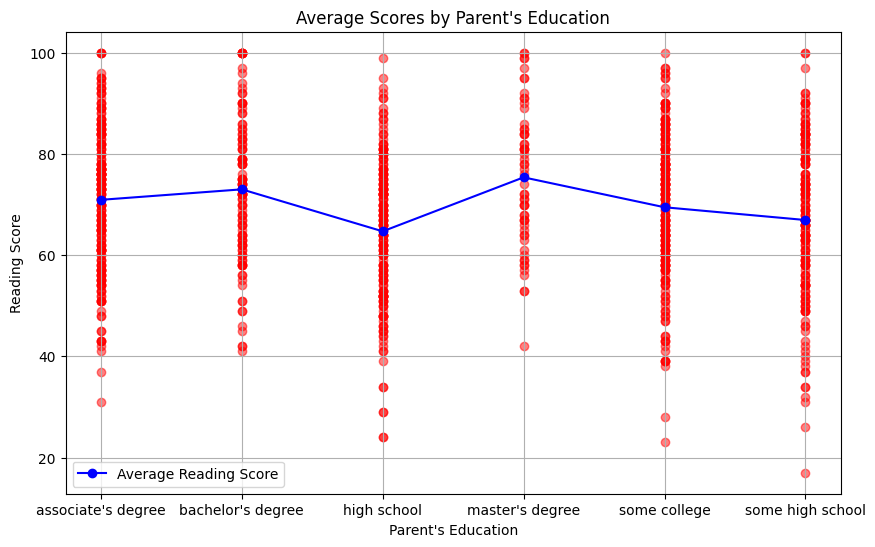

In [ ]:
avg_reading_score = df.groupby('parent edu')['reading score'].mean().reset_index()
avg_reading_score = avg_reading_score.sort_values(by='parent edu')
X = avg_reading_score['parent edu']
y_avg = avg_reading_score['reading score']

plt.figure(figsize=(10, 6))
plt.plot(X, y_avg, marker='o', color='blue', linestyle='-', label='Average Reading Score')

actual_scores = df.groupby('parent edu')['reading score'].apply(list).reset_index()
for i, row in actual_scores.iterrows():
    race_group = row['parent edu']
    scores = row['reading score']
    plt.scatter([race_group] * len(scores), scores, color='red', alpha=0.5)

plt.title('Average Scores by Parent\'s Education')
plt.xlabel('Parent\'s Education')
plt.ylabel('Reading Score')
plt.legend()
plt.grid(True)
plt.show()

#8. Evaluation of Model Strength

I have a decent amount of faith in the strength of our model, considering the margin of error(s).

In [ ]:
import numpy as np
import scipy.stats as stats

group_counts = df['race_eth'].value_counts()

proportions = group_counts / len(df)

n = len(df)

confidence_level = 0.95

z_score = stats.norm.ppf((1 + confidence_level) / 2)

margin_of_error = z_score * np.sqrt(proportions * (1 - proportions) / n)

for group_name, prop, error in zip(group_counts.index, proportions, margin_of_error):
    print(f"{group_name}: Proportion = {prop:.2f}, Margin of Error = {error:.4f}")


group C: Proportion = 0.32, Margin of Error = 0.0289
group D: Proportion = 0.26, Margin of Error = 0.0273
group B: Proportion = 0.19, Margin of Error = 0.0243
group E: Proportion = 0.14, Margin of Error = 0.0215
group A: Proportion = 0.09, Margin of Error = 0.0176


#9. Contribution

Mongolia Lee: wrote 1, 2, 3, 4
Jubal Whitlatch: wrote 5, 7, 8, attempted 6